In [74]:
fname = '/home/alexis/workspace/tmp_public/recv_ms100.csv'
df = pd.read_csv(fname)
print df.loc[df.nsecs >= 1916677499979].head(8)

                nsecs  cpu                   event  pid  comm
609949  1916677499979    0  irq__irq_handler_entry  211  perf
609950  1916677500431    0      irq__softirq_raise  211  perf
609951  1916677500873    0   irq__irq_handler_exit  211  perf
609952  1916677501428    0      irq__softirq_entry  211  perf
609953  1916677502369    0  net__netif_receive_skb  211  perf
609954  1916677503779    0  net__netif_receive_skb  211  perf
609955  1916677504801    0         napi__napi_poll  211  perf
609956  1916677505244    0       irq__softirq_exit  211  perf



```
# cat /proc/interrupts | grep virtio
 24:          0          0   PCI-MSI 49152-edge      virtio0-config
 25:    1476198          0   PCI-MSI 49153-edge      virtio0-input.0
 26:          2          0   PCI-MSI 49154-edge      virtio0-output.0
```

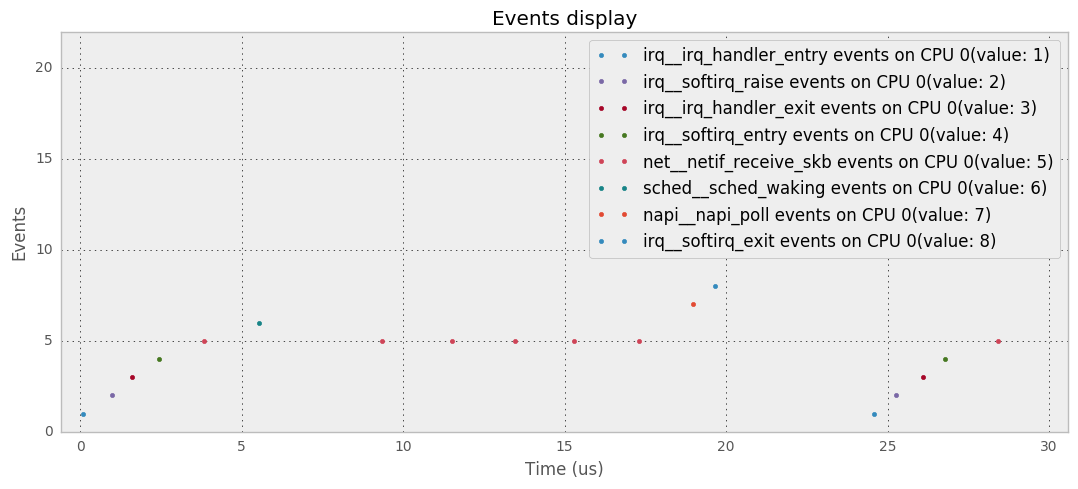

In [75]:
fname = '/home/alexis/workspace/tmp_public/recv_ms100.csv'
df = pd.read_csv(fname)
lps.plot_event_timeline(df, offset='490010us', delay='30us')

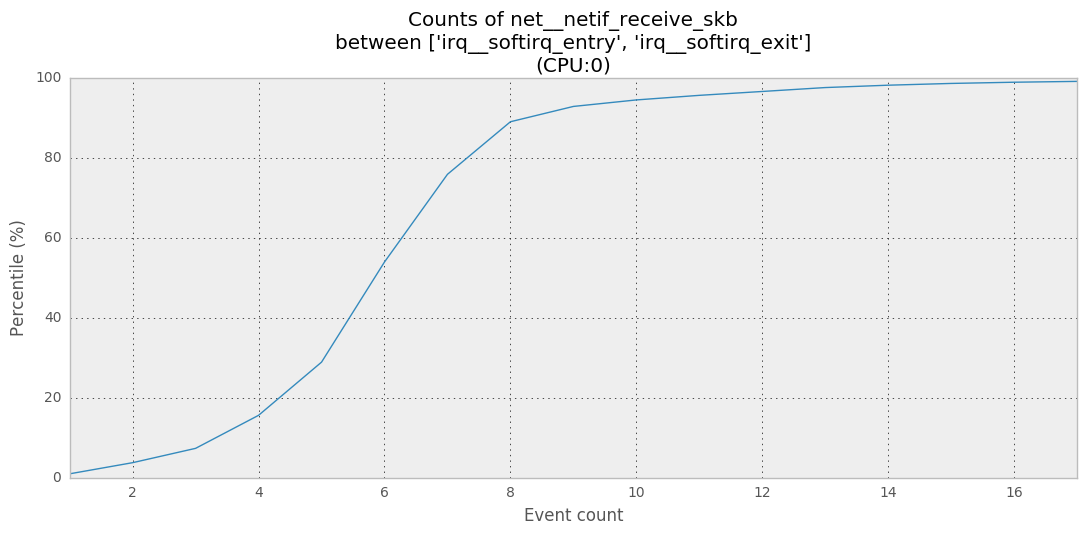

CPU 0
count   87,115.00
mean         6.61
std          3.22
min          1.00
25%          5.00
50%          6.00
75%          7.00
max         64.00
dtype: float64
CPU 1
count   0.00
mean     nan
std      nan
min      nan
25%      nan
50%      nan
75%      nan
max      nan
dtype: float64


Counts of events net__netif_receive_skb between the events ['irq__softirq_entry', 'irq__softirq_exit']


In [76]:
fname = '/home/alexis/workspace/tmp_public/recv_ms100.csv'
df = pd.read_csv(fname)
lps.print_event_counts(df, 'net__netif_receive_skb', 'irq__softirq_entry', 'irq__softirq_exit')
lps.plot_event_counts(df, 'net__netif_receive_skb', 'irq__softirq_entry', 'irq__softirq_exit',cpu=0)

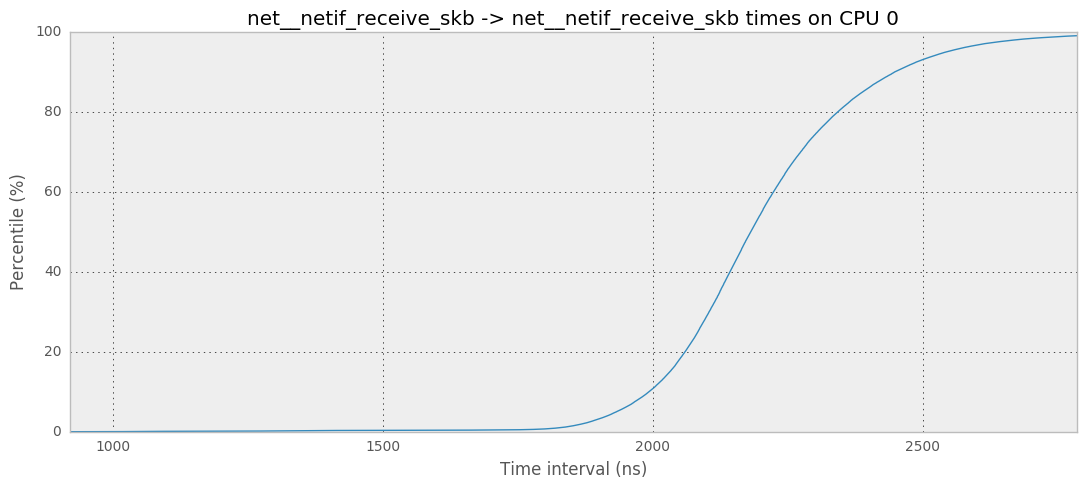

count   0.00
mean     nan
std      nan
min      nan
25%      nan
50%      nan
75%      nan
max      nan
Name: duration, dtype: float64


count   403,923.00
mean      2,210.53
std         787.99
min         920.00
25%       2,084.00
50%       2,182.00
75%       2,306.00
max     338,375.00
Name: duration, dtype: float64
CPU 1


Time interval statistics from net__netif_receive_skb to net__netif_receive_skb :
CPU 0


In [77]:
fname = '/home/alexis/workspace/tmp_public/recv_ms100.csv'
df = pd.read_csv(fname)
lps.print_event_intervals(df, 'net__netif_receive_skb', 'net__netif_receive_skb')
lps.plot_event_intervals(df, 'net__netif_receive_skb', 'net__netif_receive_skb', cpu=0)

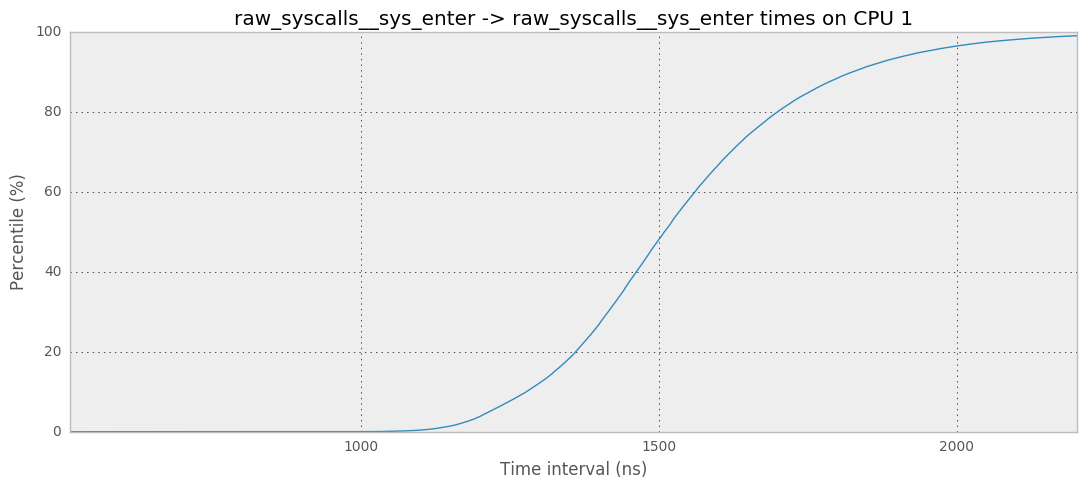

count      377,864.00
mean         2,207.87
std         68,219.69
min            512.00
25%          1,391.00
50%          1,510.00
75%          1,658.00
max     10,969,450.00
Name: duration, dtype: float64


count   1,388,553.00
mean          728.31
std           421.31
min             0.00
25%           667.00
50%           683.00
75%           697.00
max       129,730.00
Name: duration, dtype: float64
CPU 1


Time interval statistics from raw_syscalls__sys_enter to raw_syscalls__sys_enter :
CPU 0


In [79]:
fname = '/home/alexis/workspace/tmp_public/recv_ms100.csv'
df = pd.read_csv(fname)
lps.print_event_intervals(df, 'raw_syscalls__sys_enter', 'raw_syscalls__sys_enter')
lps.plot_event_intervals(df, 'raw_syscalls__sys_enter', 'raw_syscalls__sys_enter', cpu=1)

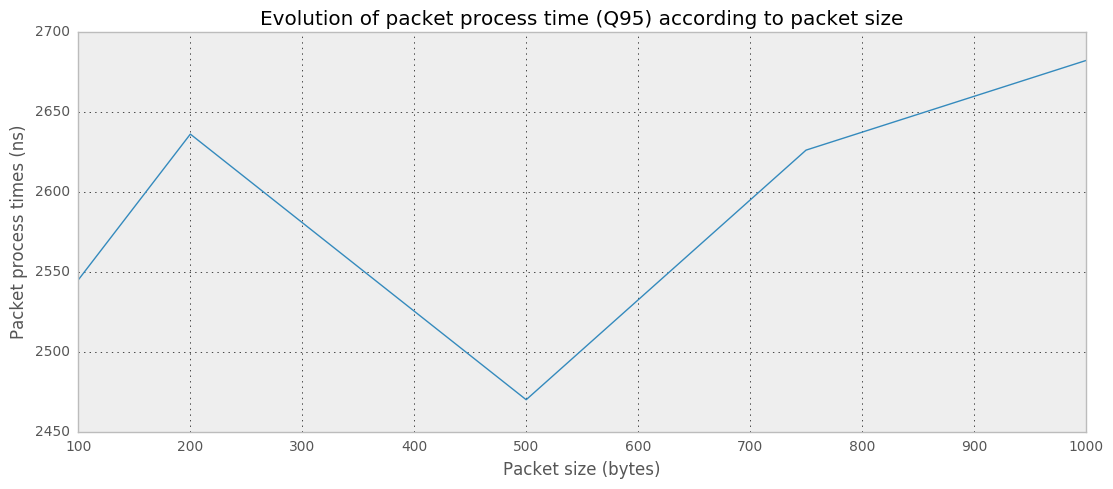

Standard deviation of packet process time: 3.24447980234


In [66]:
m_sizes = [100, 200, 500, 750, 1000]

fnames = [
    '/home/alexis/workspace/tmp_public/recv_ms100.csv',
    '/home/alexis/workspace/tmp_public/recv_ms200.csv',
    '/home/alexis/workspace/tmp_public/recv_ms500.csv',
    '/home/alexis/workspace/tmp_public/recv_ms750.csv',
    '/home/alexis/workspace/tmp_public/recv_ms1000.csv',
]

quantile_values = []

# For each results file, compute a 95 percentile value for time
# intervals between 2 net__netif_receive_skb events
for i, m_size in enumerate(m_sizes):
    fname = fnames[i]
    df = pd.read_csv(fname)
    value = lps.get_event_itv_quantile(df,
				       'net__netif_receive_skb',
				       'net__netif_receive_skb',
				       quantile_value=0.95)
    quantile_values.append(value)

# Create a Pandas Series with the calculated values to...
sr = pd.Series(quantile_values, index=m_sizes)
# ...get an idea of the standard derivative and...
print 'Standard deviation of packet process time:', sr.std() * 100 / sr.mean()
# ... and plot the values
plot = sr.plot()
plot.set_title('Evolution of packet process time (Q95) according to packet size')
plot.set_ylabel('Packet process times (ns)')
plot.set_xlabel('Packet size (bytes)')

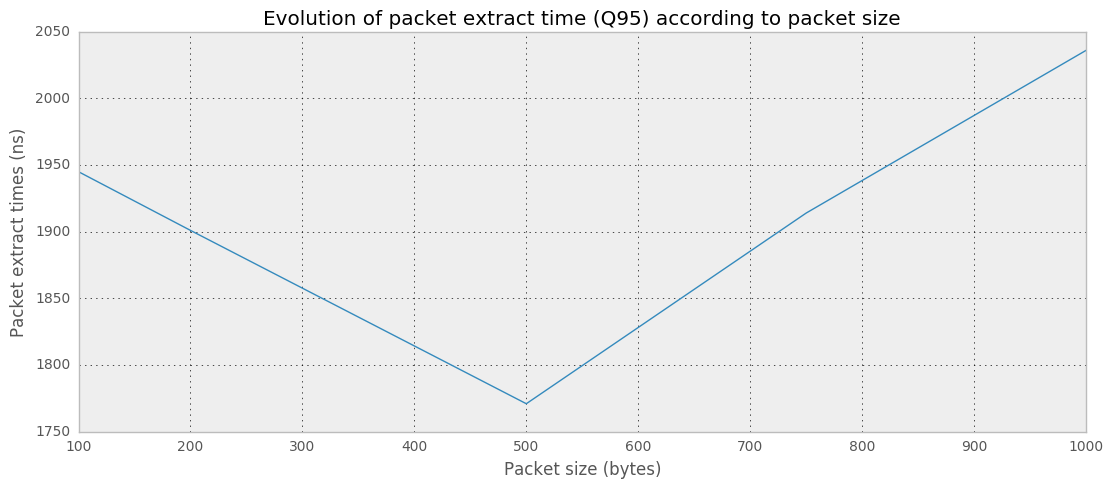

Standard deviation of packet process time: 4.9897606487


In [83]:
m_sizes = [100, 200, 500, 750, 1000]

fnames = [
    '/home/alexis/workspace/tmp_public/recv_ms100.csv',
    '/home/alexis/workspace/tmp_public/recv_ms200.csv',
    '/home/alexis/workspace/tmp_public/recv_ms500.csv',
    '/home/alexis/workspace/tmp_public/recv_ms750.csv',
    '/home/alexis/workspace/tmp_public/recv_ms1000.csv',
]

quantile_values = []

# For each results file, compute a 95 percentile value for time
# intervals between 2 net__netif_receive_skb events
for i, m_size in enumerate(m_sizes):
    fname = fnames[i]
    df = pd.read_csv(fname)
    value = lps.get_event_itv_quantile(df,
				       'raw_syscalls__sys_enter',
				       'raw_syscalls__sys_enter',
				       quantile_value=0.95, cpu=1)
    quantile_values.append(value)

# Create a Pandas Series with the calculated values to...
sr = pd.Series(quantile_values, index=m_sizes)
# ...get an idea of the standard derivative and...
print 'Standard deviation of packet process time:', sr.std() * 100 / sr.mean()
# ... and plot the values
plot = sr.plot()
plot.set_title('Evolution of packet extract time (Q95) according to packet size')
plot.set_ylabel('Packet extract times (ns)')
plot.set_xlabel('Packet size (bytes)')

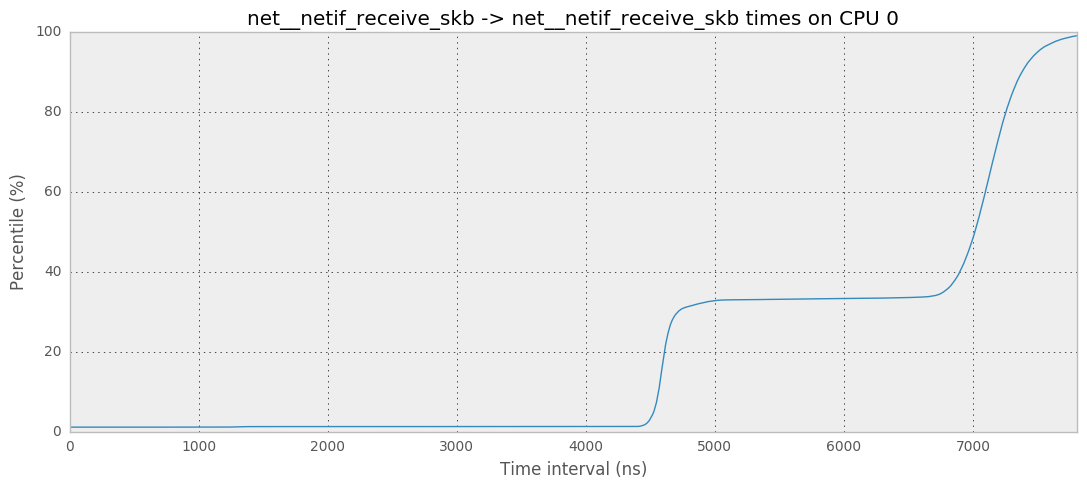

count   0.00
mean     nan
std      nan
min      nan
25%      nan
50%      nan
75%      nan
max      nan
Name: duration, dtype: float64


count   107,268.00
mean      6,283.19
std       2,308.95
min           0.00
25%       4,640.00
50%       7,016.00
75%       7,212.00
max     553,582.00
Name: duration, dtype: float64
CPU 1


Time interval statistics from net__netif_receive_skb to net__netif_receive_skb :
CPU 0


In [60]:
fname = '/home/alexis/workspace/tmp_public/no_sock_ms100.csv'
df = pd.read_csv(fname)
lps.print_event_intervals(df, 'net__netif_receive_skb', 'net__netif_receive_skb')
lps.plot_event_intervals(df, 'net__netif_receive_skb', 'net__netif_receive_skb', cpu=0)

```
# Samples: 2K of event 'cycles'
# Event count (approx.): 136738291
#
# Overhead  Command      Shared Object      Symbol
# ........  ...........  .................  .........................................
#
     8.57%  netserver    [kernel.kallsyms]  [k] copy_user_enhanced_fast_string
     4.14%  netserver    [kernel.kallsyms]  [k] skb_copy_datagram_iter
     3.40%  netserver    [kernel.kallsyms]  [k] udp_recvmsg
     2.97%  netserver    [kernel.kallsyms]  [k] __slab_free
     2.23%  netserver    [kernel.kallsyms]  [k] skb_release_data
     2.16%  netserver    [kernel.kallsyms]  [k] sys_recvfrom
     2.10%  netserver    [kernel.kallsyms]  [k] queued_spin_lock_slowpath
     2.09%  netserver    [kernel.kallsyms]  [k] _raw_spin_lock_irqsave
     1.97%  netserver    [kernel.kallsyms]  [k] __fget_light
     1.81%  swapper      [kernel.kallsyms]  [k] native_write_msr_safe
     1.68%  netserver    [kernel.kallsyms]  [k] entry_SYSCALL_64
     1.68%  netserver    [kernel.kallsyms]  [k] copy_page_to_iter
     1.60%  netserver    [kernel.kallsyms]  [k] __skb_try_recv_datagram
     1.56%  netserver    [kernel.kallsyms]  [k] _raw_spin_lock_bh
```

```
# Samples: 2K of event 'cycles'
# Event count (approx.): 1497536269
#
# Overhead  Command      Shared Object      Symbol
# ........  ...........  .................  .........................................
#
     8.17%  swapper      [kernel.kallsyms]  [k] native_write_msr_safe
     6.14%  swapper      [kernel.kallsyms]  [k] pvclock_clocksource_read
     3.22%  netserver    [kernel.kallsyms]  [k] copy_user_enhanced_fast_string
     2.39%  swapper      [kernel.kallsyms]  [k] hrtimer_start_range_ns
     2.21%  netserver    [kernel.kallsyms]  [k] skb_copy_datagram_iter
     2.11%  swapper      [kernel.kallsyms]  [k] reschedule_interrupt
     2.00%  swapper      [kernel.kallsyms]  [k] __schedule
     1.98%  swapper      [kernel.kallsyms]  [k] enqueue_entity
     1.94%  netserver    [kernel.kallsyms]  [k] dequeue_entity
     1.84%  netserver    [kernel.kallsyms]  [k] skb_release_data
     1.78%  netserver    [kernel.kallsyms]  [k] udp_recvmsg
     1.68%  netserver    [kernel.kallsyms]  [k] sys_recvfrom
     1.51%  netserver    [kernel.kallsyms]  [k] __skb_try_recv_datagram
     1.29%  netserver    [kernel.kallsyms]  [k] pvclock_clocksource_read
 ```    

# VM with 1 core

```
[alexis@marx-slim tmp_public]$ sudo pidstat -p `pidof qemu-system-x86_64` -t 1
Linux 4.5.4-1-ARCH (marx-slim)  06/02/2016      _x86_64_        (4 CPU)

10:50:35 AM   UID      TGID       TID    %usr %system  %guest    %CPU   CPU  Command
10:50:36 AM     0      6869         -   71.00   41.00   87.00  100.00     1  qemu-system-x86
10:50:36 AM     0         -      6869   70.00   29.00    0.00   99.00     1  |__qemu-system-x86
10:50:36 AM     0         -      6870    0.00    0.00    0.00    0.00     0  |__qemu-system-x86
10:50:36 AM     0         -      6874    0.00   12.00   87.00   99.00     0  |__qemu-system-x86
```

In [116]:
fname = '/home/alexis/workspace/tmp_public/recv_1core_ms100.csv'
df = pd.read_csv(fname)
df.loc[df.nsecs >= 2108404020239].head(14)

                 nsecs  cpu                    event  pid       comm
2714252  2108404020239    0   irq__irq_handler_entry  177  netserver
2714253  2108404020664    0       irq__softirq_raise  177  netserver
2714254  2108404021030    0    irq__irq_handler_exit  177  netserver
2714255  2108404021497    0       irq__softirq_entry  177  netserver
2714256  2108404022233    0   net__netif_receive_skb  177  netserver
2714257  2108404023469    0   net__netif_receive_skb  177  netserver
2714258  2108404024509    0   net__netif_receive_skb  177  netserver
2714259  2108404025449    0   net__netif_receive_skb  177  netserver
2714260  2108404026226    0          napi__napi_poll  177  netserver
2714261  2108404026618    0        irq__softirq_exit  177  netserver
2714262  2108404028012    0  raw_syscalls__sys_enter  177  netserver
2714263  2108404030393    0   irq__irq_handler_entry  177  netserver
2714264  2108404030793    0       irq__softirq_raise  177  netserver
2714265  2108404031170    0    irq

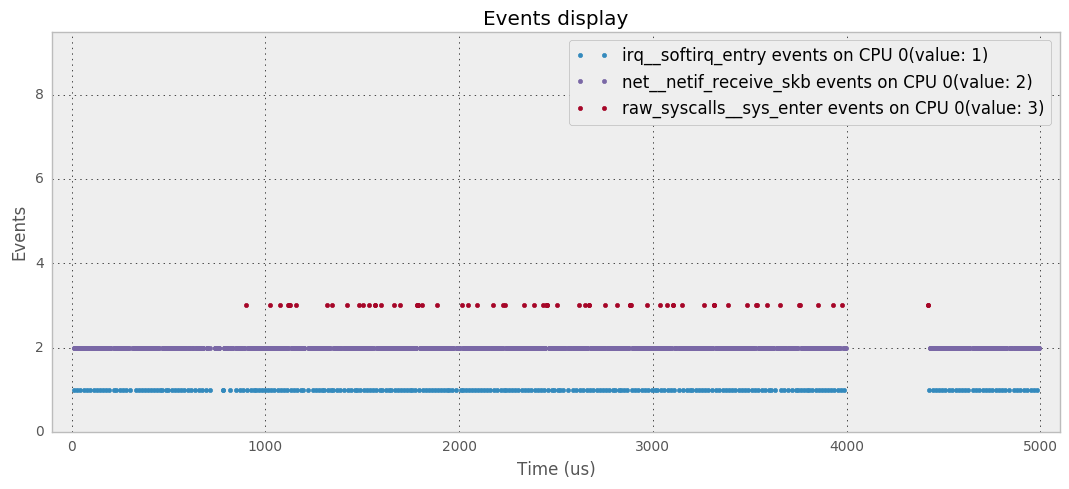

In [137]:
fname = '/home/alexis/workspace/tmp_public/recv_1core_ms100.csv'
df = pd.read_csv(fname)

selected_events = (
    'raw_syscalls__sys_enter',
    'irq__softirq_entry', 'net__netif_receive_skb'
)

selection = df.event.map(lambda x: x in selected_events)
lps.plot_event_timeline(df.loc[selection], offset='990ms', delay='5ms')

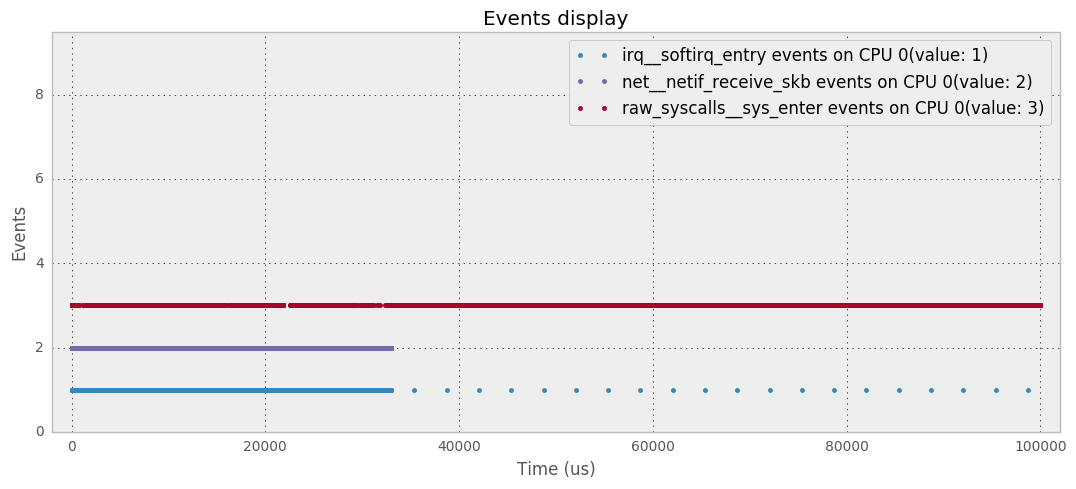

In [138]:
fname = '/home/alexis/workspace/tmp_public/recv_1core_ms100.csv'
df = pd.read_csv(fname)

selected_events = (
    'raw_syscalls__sys_enter',
    'irq__softirq_entry', 'net__netif_receive_skb'
)

selection = df.event.map(lambda x: x in selected_events)

lps.plot_event_timeline(df.loc[selection], offset='3502ms', delay='100ms')

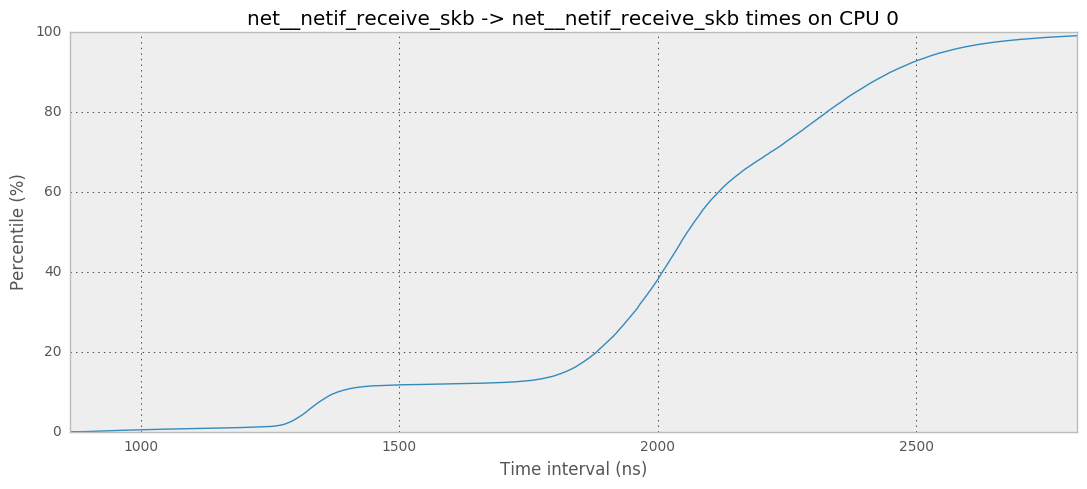

count   473,196.00
mean      2,057.83
std         467.59
min         863.00
25%       1,923.00
50%       2,058.00
75%       2,276.00
max      61,872.00
Name: duration, dtype: float64


Time interval statistics from net__netif_receive_skb to net__netif_receive_skb :
CPU 0


In [139]:
fname = '/home/alexis/workspace/tmp_public/recv_1core_ms100.csv'
df = pd.read_csv(fname)
lps.print_event_intervals(df, 'net__netif_receive_skb', 'net__netif_receive_skb')
lps.plot_event_intervals(df, 'net__netif_receive_skb', 'net__netif_receive_skb')

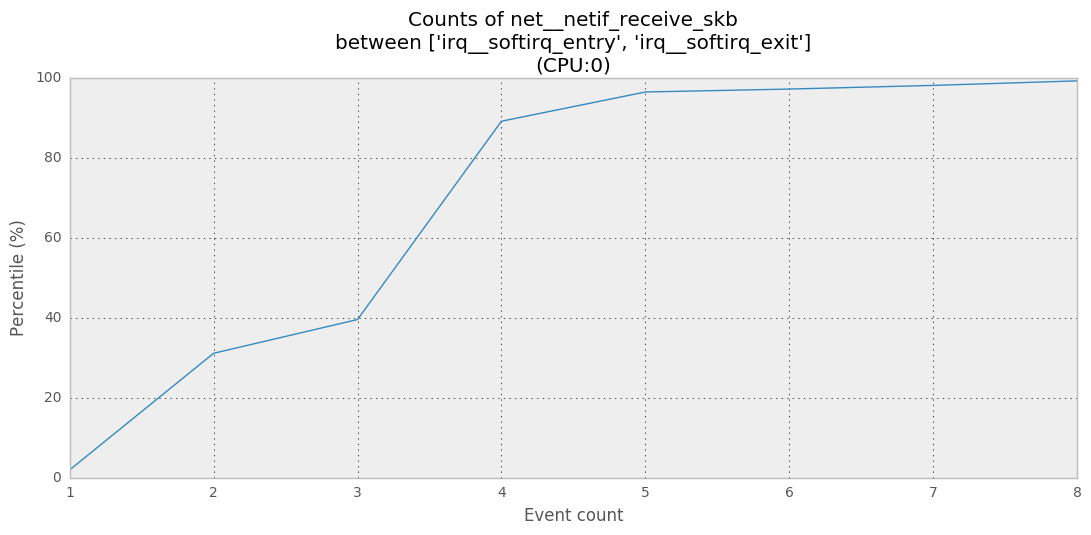

CPU 0
count   187,385.00
mean          3.53
std           2.07
min           1.00
25%           2.00
50%           4.00
75%           4.00
max          64.00
dtype: float64


Counts of events net__netif_receive_skb between the events ['irq__softirq_entry', 'irq__softirq_exit']


In [140]:
fname = '/home/alexis/workspace/tmp_public/recv_1core_ms100.csv'
df = pd.read_csv(fname)
lps.print_event_counts(df, 'net__netif_receive_skb', 'irq__softirq_entry', 'irq__softirq_exit')
lps.plot_event_counts(df, 'net__netif_receive_skb', 'irq__softirq_entry', 'irq__softirq_exit',cpu=0)

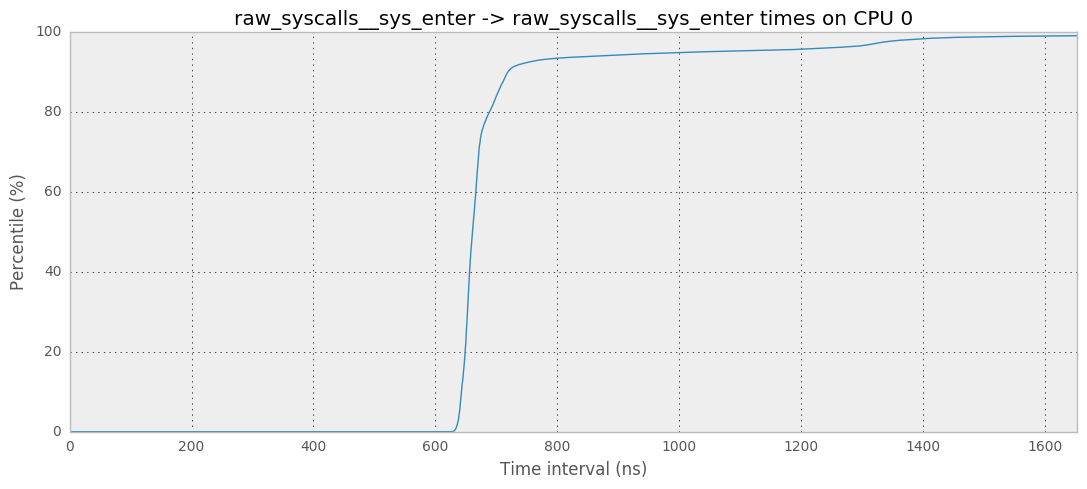

count   1,509,716.00
mean          723.01
std         1,246.48
min             0.00
25%           651.00
50%           661.00
75%           677.00
max       540,799.00
Name: duration, dtype: float64


Time interval statistics from raw_syscalls__sys_enter to raw_syscalls__sys_enter :
CPU 0


In [141]:
fname = '/home/alexis/workspace/tmp_public/recv_1core_ms100.csv'
df = pd.read_csv(fname)
lps.print_event_intervals(df, 'raw_syscalls__sys_enter', 'raw_syscalls__sys_enter')
lps.plot_event_intervals(df, 'raw_syscalls__sys_enter', 'raw_syscalls__sys_enter')

# Annex A: Pre-requisite python import code

In [4]:
import pandas as pd
import linux_perf_stats as lps

pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline
lps.configure_plots()

-c:7: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

